# Feature Detection

Robert Cross

In [2]:
# Importing libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

check root directory

In [3]:
pwd

'c:\\Users\\Ezekiel\\Documents\\GitHub\\graphics-and-visual-computing\\BACUNGAN_GVC'

In [4]:
# creating a file list
file_list = []

# traversing the root directory
for (root, dirs, files) in os.walk(os.getcwd()):
    for f in files:
        if f.endswith(('jpg', 'jpeg', 'png')): # get all image files
            file_list.append(os.path.join(root, f))

# display all the image files with index number
counter = 0;
for file in file_list:
    print(counter,file)
    counter = counter + 1;

0 c:\Users\Ezekiel\Documents\GitHub\graphics-and-visual-computing\BACUNGAN_GVC\blank_canvas_blue_rectangle.png
1 c:\Users\Ezekiel\Documents\GitHub\graphics-and-visual-computing\BACUNGAN_GVC\shapes1.jpg
2 c:\Users\Ezekiel\Documents\GitHub\graphics-and-visual-computing\BACUNGAN_GVC\resources\blank_canvas_blue_rectangle.png
3 c:\Users\Ezekiel\Documents\GitHub\graphics-and-visual-computing\BACUNGAN_GVC\resources\blank_canvas_blue_rectangle_resize.png
4 c:\Users\Ezekiel\Documents\GitHub\graphics-and-visual-computing\BACUNGAN_GVC\resources\blank_canvas_blue_rectangle_revise.png
5 c:\Users\Ezekiel\Documents\GitHub\graphics-and-visual-computing\BACUNGAN_GVC\resources\blank_canvas_violet_rectangle.png
6 c:\Users\Ezekiel\Documents\GitHub\graphics-and-visual-computing\BACUNGAN_GVC\resources\box.jpg
7 c:\Users\Ezekiel\Documents\GitHub\graphics-and-visual-computing\BACUNGAN_GVC\resources\cameraman.jpg
8 c:\Users\Ezekiel\Documents\GitHub\graphics-and-visual-computing\BACUNGAN_GVC\resources\car.png
9

In [5]:
# saving the file path to a variable
image1_file_path = file_list[16] # use squirel2.jpg

In [18]:
# loading image and storing it in a variable
image_squirel2 = cv2.imread(image1_file_path, cv2.IMREAD_GRAYSCALE).astype('float64')


In [19]:
# Define the Rober Cross Kernels
kernel_x = np.array([[1, 0],
                     [0, -1]], dtype=np.float32)
kernel_y = np.array([[0, 1],
                     [-1, 0]], dtype=np.float32)

In [20]:
# Apply the convolution using cv2.filter2D
grad_x = cv2.filter2D(image_squirel2, ddepth=-1, kernel=kernel_x)
grad_y = cv2.filter2D(image_squirel2, ddepth=-1, kernel=kernel_y)

In [21]:
# Compute the gradient magnitude using the Euclidean norm
gradient_magnitude = np.sqrt(np.square(grad_x) + np.square(grad_y))

# Normalize and convert to 8-bit format
gradient_magnitude = np.clip(gradient_magnitude, 0, 255)
gradient_magnitude = gradient_magnitude.astype(np.uint8)

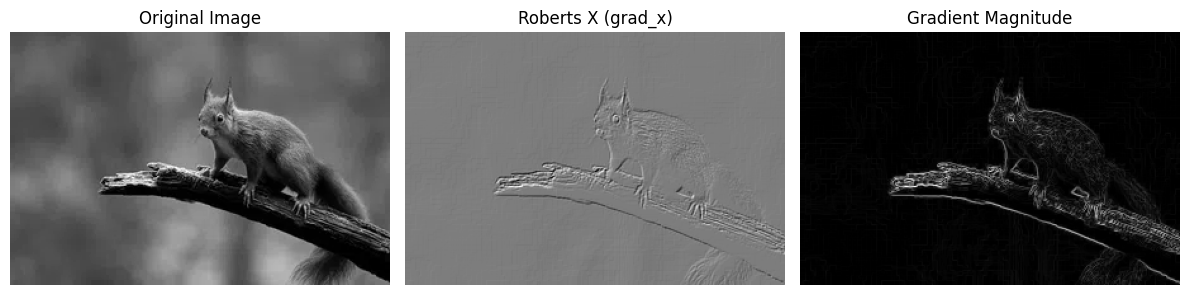

In [22]:
# Display the images: original, gradients, and edge magnitude
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image_squirel2, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(grad_x, cmap='gray')
plt.title("Roberts X (grad_x)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title("Gradient Magnitude")
plt.axis('off')

plt.tight_layout()
plt.show()